# Ad Click Prediction

Given a dataset containing informations about viewers of a website, we are demanded to construct a model which can predict whether a viewer will click on an ad. The raw dataset is shown below.

In [1]:
import pandas as pd
df=pd.read_csv('Ad_Click_Data.csv')
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1.0,Lebanon,2/11/2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1.0,Bosnia and Herzegovina,4/22/2016 2:07,1
997,NaN,51,42415.72,120.37,Expanded intangible solution,South Jessica,1.0,Mongolia,2/1/2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0.0,Guatemala,3/24/2016 2:35,0


Let us begin by droping duplicates in the dataset and then observing the features of the dataset.

In [2]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 85.9+ KB


From the information above, it is clear that we have to convert the format of the Timestamp feature.

In [3]:
from datetime import datetime
df['Timestamp']=df['Timestamp'].apply(lambda x : datetime.strptime(x, '%m/%d/%Y %H:%M'))
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  987 non-null    float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               987 non-null    float64       
 3   Daily Internet Usage      989 non-null    float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      999 non-null    object        
 6   Male                      997 non-null    float64       
 7   Country                   991 non-null    object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 85.9+ KB


Having finished with the Timestamp feature, now we have to check whether there are outliers in our dataset.

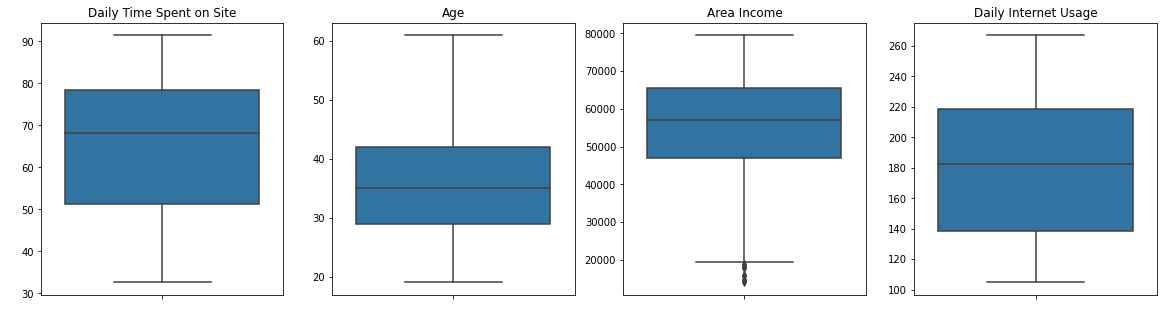

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,5))
plt.subplot(1, 4, 1)
sns.boxplot(data=df, y='Daily Time Spent on Site')
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Daily Time Spent on Site')
plt.subplot(1, 4, 2)
sns.boxplot(data=df, y='Age')
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Age')
plt.subplot(1, 4, 3)
sns.boxplot(data=df, y='Area Income')
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Area Income')
plt.subplot(1, 4, 4)
sns.boxplot(data=df, y='Daily Internet Usage')
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Daily Internet Usage')
plt.show()

From the figure above, it can be seen that there are outliers in the Area Income feature, thus we will drop those outliers.

In [5]:
Q1=df['Area Income'].quantile(0.25)
Q3=df['Area Income'].quantile(0.75)
IQR=Q3-Q1
df=df[~((df['Area Income'] < (Q1-1.5*IQR)) | (df['Area Income'] > (Q3+1.5*IQR)))]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  979 non-null    float64       
 1   Age                       992 non-null    int64         
 2   Area Income               979 non-null    float64       
 3   Daily Internet Usage      981 non-null    float64       
 4   Ad Topic Line             992 non-null    object        
 5   City                      991 non-null    object        
 6   Male                      989 non-null    float64       
 7   Country                   983 non-null    object        
 8   Timestamp                 992 non-null    datetime64[ns]
 9   Clicked on Ad             992 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(3)
memory usage: 85.2+ KB


Now, before handling the missing values, it is worthwhile for us to see the correlation matrix of our dataset.

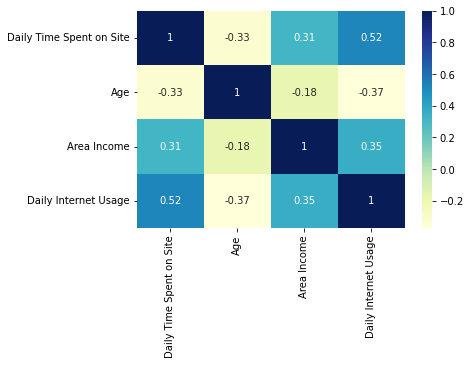

In [6]:
df2=df.copy()
plt.figure()
sns.heatmap(df2[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']].corr(), annot=True,cmap='YlGnBu')
plt.show()

From the correlation matrix above it can be implied that we can handle the missing values in the other features by first dividing the Age feature into several group and then use the mean value of each group to fill the missing values.

In [7]:
df2['Age_Div'] = pd.qcut(df2['Age'],10)

In [8]:
df2['Daily Time Spent on Site'] = df2.groupby(['Age_Div'])['Daily Time Spent on Site'].apply(lambda x: x.fillna(x.mean()))

In [9]:
df2['Area Income'] = df2.groupby(['Age_Div'])['Area Income'].apply(lambda x: x.fillna(x.mean()))

In [10]:
df2['Daily Internet Usage'] = df2.groupby(['Age_Div'])['Daily Internet Usage'].apply(lambda x: x.fillna(x.mean()))

In [11]:
df2.dropna(inplace=True)

From the Timestamp feature we can create a new feature by grouping the Timestamp into day time and night time.

In [12]:
Dawn=datetime.strptime('06:00:00','%H:%M:%S')
Sunset=datetime.strptime('18:00:00','%H:%M:%S')
df2['Time_Div']=df2['Timestamp'].apply(lambda x: 1 if Dawn.time()<=x.time()<Sunset.time() else 0)

Before constructing a model, it is imperative for us to normalize our dateset.

In [13]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler() 
scaling_column = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male',\
                  'Clicked on Ad', 'Time_Div']
df2[scaling_column] = scaler.fit_transform(df2[scaling_column])

Now we can split the label and features of our dataset and subsequently we can build a predictive model.

In [14]:
X=df2.drop(['Clicked on Ad','Ad Topic Line','City','Country','Timestamp','Age_Div'],axis=1)
y=df2['Clicked on Ad']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model=model.fit(X_train,y_train)
y_pred=model.predict(X_test)

Finally, we can evaluate the quality of our predictive model.

Training Accuracy : 1.0
Testing Accuracy : 0.9438775510204082


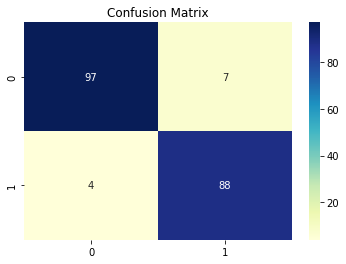

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
        
# evaluating the model
print('Training Accuracy :', model.score(X_train,y_train))
print('Testing Accuracy :', model.score(X_test,y_test))
cm=confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# classification report
print('\nClassification report:')
cr=classification_report(y_test,y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       104
         1.0       0.93      0.96      0.94        92

    accuracy                           0.94       196
   macro avg       0.94      0.94      0.94       196
weighted avg       0.94      0.94      0.94       196



# Conclusion

We have built a model to predict the possibility of a viewer to click on an ad. The predictive model built based on the DecisionTreeClassifier module provide 100% training accuracy and 94% testing accuracy.